In [ ]:
# Task 3 

In [ ]:
# Unemployment Analysis with Python

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set_style("whitegrid")


In [43]:
# Make sure the CSV file is in the same folder as this notebook
df = pd.read_csv("Unemployment in India.csv")

# Look at first few rows
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [44]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("\nMissing values per column:")
print(df.isnull().sum())


Rows: 768
Columns: 7

Missing values per column:
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [46]:
print(df.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [47]:
df.columns = df.columns.str.strip()   # remove spaces before/after names
print(df.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [49]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


In [51]:
print(df.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Year', 'Month'],
      dtype='object')


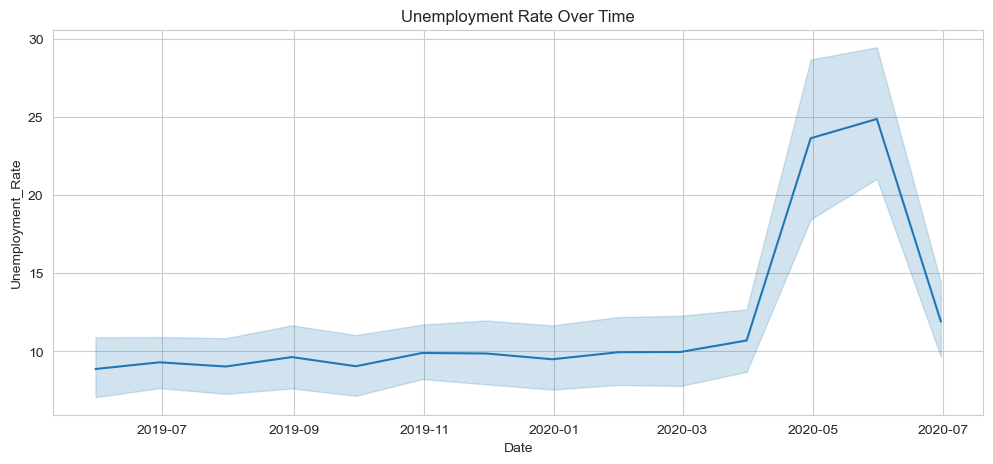

In [52]:
df = df.rename(columns={'Estimated Unemployment Rate (%)': 'Unemployment_Rate'})

sns.lineplot(data=df, x='Date', y='Unemployment_Rate')
plt.title('Unemployment Rate Over Time')
plt.show()


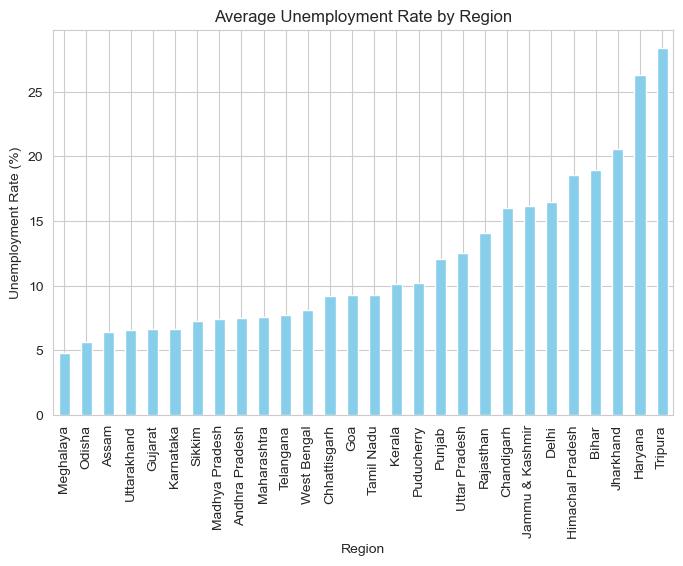

In [53]:
avg_region = df.groupby("Region")["Unemployment_Rate"].mean().sort_values()

avg_region.plot(kind="bar", color="skyblue", figsize=(8,5))
plt.title("Average Unemployment Rate by Region")
plt.ylabel("Unemployment Rate (%)")
plt.show()
